# What to do?
* Predict if a text is easier to read or not.
* The more negative a score the more un-readable it is.
* At first instance this looks like a tabular data.
* perhaps this is also regression as we have continuous values in targets

look into the data

In [1]:
import random
import math
from typing import List, TypeVar
from pandas.core.frame import DataFrame
from fastai.basics import *
from fastai.callback.all import *
from fastai.text.all import *

custom typings

In [2]:
path = Path('../input/commonlit-dataaug')

In [3]:
df_train = pd.read_csv('../input/commonlit-dataaug/aug_df.csv')
df_train.head(4)

,Unnamed: 0,id,url_legal,license,excerpt,target,standard_error
0,0,c12129c31,NaN,NaN,"When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.\nThe floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.\nAt each end of the room, on the wall, hung a beautiful bear-skin rug.\nThe...",-0.340259,0.464009
1,1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewhat silent, her eyes resting on Dolly with a wistful, uncertain expression. She wanted to give the child the pleasure she craved, but she had hard work to bring herself to the point of overcoming her own objections.\nAt last, however, when the meal was nearly over, she smiled at her little daughter, and said, ""All right, Dolly, you may go.""\n""Oh, mother!"" Dolly cried, overwhelmed with sudden delight. ""Really?\nOh, I am so glad! Are you sure you're willing?""\n""I've persuaded myself to be willing, against my will,"" returned Mrs. Fayre, whimsically...",-0.315372,0.480805
2,2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as quickly as it came, and two days after their sleigh ride there was scarcely a vestige of white on the ground. Tennis was again possible and a great game was in progress on the court at Pine Laurel. Patty and Roger were playing against Elise and Sam Blaney, and the pairs were well matched.\nBut the long-contested victory finally went against Patty, and she laughingly accepted defeat.\n""Only because Patty's not quite back on her game yet,"" Roger defended; ""this child has been on the sick list, you know, Sam, and she isn't up to her own mark.""\n""We...",-0.580118,0.476676
3,3,dd1000b26,NaN,NaN,"And outside before the palace a great garden was walled round, filled full of stately fruit-trees, gray olives and sweet figs, and pomegranates, pears, and apples, which bore the whole year round. For the rich south-west wind fed them, till pear grew ripe on pear, fig on fig, and grape on grape, all the winter and the spring. And at the farther end gay flower-beds bloomed through all seasons of the year; and two fair fountains rose, and ran, one through the garden grounds, and one beneath the palace gate, to water all the town. Such noble gifts the heavens had given to Alcinous the wise.\n...",-1.054013,0.450007


In [4]:
df_train.tail(4)

,Unnamed: 0,id,url_legal,license,excerpt,target,standard_error
7405,7405,f301ff005,http://static.ehe.osu.edu/sites/beyond/penguins/downloads/feature-stories/tundra-k1-text.pdf,CC BY-SA 3.0,"Near the top of the world is land called tundra. The tundra is flat and has no trees. It is covered by snow and ice most of the year. \nIn the spring, the snow and ice melt. Beneath the ground, the soil stays frozen. The ground gets very soggy. It is a marsh.\nSmall yellow flowers grow from the cold, soaked ground. They are called marsh marigolds.\nFlies hide in the flowers. They soak up the Sun’s energy and get warm.\nThe flies fly from flower to flower. They help the flowers make seeds.\nCaribou eat the flowers. The caribou also give the plants the nutrients they need to grow.\nMother fl...",0.608108,0.505921
7406,7406,25ca8f498,https://sites.ehe.osu.edu/beyondpenguins/files/2011/06/dinosaurs_45_text.pdf,CC BY-SA 3.0,"When you think of dinosaurs and where they lived, what do you picture? Do you see hot, horny swamps, thick jungles, or sunny plains? Dinosaurs lived in those places, yes. But did you know that some dinosaurs lived in the cold and the darkness near the North and South Poles?\nThis surprised scientists, too. Paleontologists used to believe that dinosaurs lived only in the warmest parts of the world. They thought that dinosaurs could only have lived in places where turtles, crocodiles, and snakes live today. Later, these dinosaur scientists began finding bones in surprising places.\nOne of th...",1.711390,0.646900
7407,7407,2c26db523,https://en.wikibooks.org/wiki/Wikijunior:The_Elements/Solids,CC BY-SA 3.0,"So what is a solid? Solids are usually hard because their molecules have been packed together. The closer your molecules are, the harder you are. Solids also can hold their own shape. A rock will always look like a rock unless something happens to it. The same goes for a diamond. Even when you grind up a solid into a powder, you will see tiny short pieces of that solid under a microscope. Liquids will move and fill up any container. Solids keep their shape.\nIn the same way that a solid holds its shape, the atoms inside of a solid are not allowed to move around too much. This is one of the...",0.189476,0.535648
7408,7408,5b990ba77,https://en.wikibooks.org/wiki/Wikijunior:Biology/Kingdoms/Animals,CC BY-SA 3.0,"Animals are made of many cells. They eat things and digest them inside. Most animals can move. Only animals have brains (though not even all animals do; jellyfish, for example, do not have brains).\nAnimals are found all over the earth. They dig in the ground, swim in the oceans, and fly in the sky.\nHumans are a type of animal. So are dogs, cats, cows, horses, frogs, fish, and so on and on.\nAnimals can be divided into two main groups, vertebrates and invertebrates. Vertebrates can be further divided into mammals, fish, birds, reptiles, and amphibians. Invertebrates can be divided into ar...",0.300779,0.512379


In [5]:
df_train.shape

(7409, 7)

dropping all columns except excerpts

In [6]:
def drop_cols(df: DataFrame, cols: List) -> DataFrame:
    return df.drop(cols, axis=1)

In [7]:
df_train_excerpts = df_train.copy()
df_train_excerpts = drop_cols(df_train_excerpts, ['id', 'url_legal', 'license', 'target', 'standard_error'])
df_train_excerpts.head(2)

,Unnamed: 0,excerpt
0,0,"When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.\nThe floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.\nAt each end of the room, on the wall, hung a beautiful bear-skin rug.\nThe..."
1,1,"All through dinner time, Mrs. Fayre was somewhat silent, her eyes resting on Dolly with a wistful, uncertain expression. She wanted to give the child the pleasure she craved, but she had hard work to bring herself to the point of overcoming her own objections.\nAt last, however, when the meal was nearly over, she smiled at her little daughter, and said, ""All right, Dolly, you may go.""\n""Oh, mother!"" Dolly cried, overwhelmed with sudden delight. ""Really?\nOh, I am so glad! Are you sure you're willing?""\n""I've persuaded myself to be willing, against my will,"" returned Mrs. Fayre, whimsically..."


In [8]:
df_test = pd.read_csv('../input/commonlitreadabilityprize/test.csv')
df_test.head(4)

,id,url_legal,license,excerpt
0,c0f722661,NaN,NaN,"My hope lay in Jack's promise that he would keep a bright light burning in the upper story to guide me on my course. On a clear night this light was visible from the village, but somehow or other I failed to take into account the state of the weather. The air was full of eddying flakes, which would render the headlight of a locomotive invisible a hundred yards distant. Strange that this important fact never occurred to me until I was fully a fourth of a mile from the village. Then, after looking in vain for the beacon light, the danger of my situation struck me, and I halted.\n""I am certai..."
1,f0953f0a5,NaN,NaN,"Dotty continued to go to Mrs. Gray's every night with the milk. Sometimes Katie went with her, and then they always paused a while under the acorn-tree and played ""King and Queen."" Dotty said she wished they could ever remember to bring their nipperkins, for in that case the milk would taste a great deal more like nectar. The ""nipperkins"" were a pair of handled cups which the children supposed to be silver, and which they always used at table.\nDotty knew she was doing wrong every time she played ""King and Queen."" She knew the milk was not hers, but Mrs. Gray's; still she said to herself, ..."
2,0df072751,NaN,NaN,"It was a bright and cheerful scene that greeted the eyes of Captain Raymond and his son as they entered the parlor of the adjacent cottage.\nIt was strictly a family gathering, yet the room was quite full. Mr. Dinsmore was there with his wife, his daughter Elsie and her children, Edward and Zoe, Elsie Leland with her husband and babe, Violet Raymond with her husband's two little girls, Lulu and Grace, and lastly Rosie and Walter.\nEverybody had a kindly greeting for the captain, and Violet's bright face grew still brighter as she made room for him on the sofa by her side.\n""We were beginni..."
3,04caf4e0c,https://en.wikipedia.org/wiki/Cell_division,CC BY-SA 3.0,"Cell division is the process by which a parent cell divides into two or more daughter cells. Cell division usually occurs as part of a larger cell cycle.\n In eukaryotes, there are two distinct types of cell division: a vegetative division, whereby each daughter cell is genetically identical to the parent cell (mitosis), and a reproductive cell division, whereby the number of chromosomes in the daughter cells is reduced by half, to produce haploid gametes (meiosis). \nMeiosis results in four haploid daughter cells by undergoing one round of DNA replication followed by two divisions: homolo..."


dropping all columns except excerpts

In [9]:
df_test_excerpts = df_test.copy()
df_test_excerpts = drop_cols(df_test_excerpts, ['id', 'url_legal', 'license'])
df_test_excerpts.head(2)

,excerpt
0,"My hope lay in Jack's promise that he would keep a bright light burning in the upper story to guide me on my course. On a clear night this light was visible from the village, but somehow or other I failed to take into account the state of the weather. The air was full of eddying flakes, which would render the headlight of a locomotive invisible a hundred yards distant. Strange that this important fact never occurred to me until I was fully a fourth of a mile from the village. Then, after looking in vain for the beacon light, the danger of my situation struck me, and I halted.\n""I am certai..."
1,"Dotty continued to go to Mrs. Gray's every night with the milk. Sometimes Katie went with her, and then they always paused a while under the acorn-tree and played ""King and Queen."" Dotty said she wished they could ever remember to bring their nipperkins, for in that case the milk would taste a great deal more like nectar. The ""nipperkins"" were a pair of handled cups which the children supposed to be silver, and which they always used at table.\nDotty knew she was doing wrong every time she played ""King and Queen."" She knew the milk was not hers, but Mrs. Gray's; still she said to herself, ..."


concatenating both dataframes

In [10]:
def concat_dfs(dfs: List) -> DataFrame:
    return pd.concat(dfs)

In [11]:
df =  concat_dfs([df_train_excerpts, df_test_excerpts])
df.head(3)

,Unnamed: 0,excerpt
0,0.0,"When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.\nThe floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.\nAt each end of the room, on the wall, hung a beautiful bear-skin rug.\nThe..."
1,1.0,"All through dinner time, Mrs. Fayre was somewhat silent, her eyes resting on Dolly with a wistful, uncertain expression. She wanted to give the child the pleasure she craved, but she had hard work to bring herself to the point of overcoming her own objections.\nAt last, however, when the meal was nearly over, she smiled at her little daughter, and said, ""All right, Dolly, you may go.""\n""Oh, mother!"" Dolly cried, overwhelmed with sudden delight. ""Really?\nOh, I am so glad! Are you sure you're willing?""\n""I've persuaded myself to be willing, against my will,"" returned Mrs. Fayre, whimsically..."
2,2.0,"As Roger had predicted, the snow departed as quickly as it came, and two days after their sleigh ride there was scarcely a vestige of white on the ground. Tennis was again possible and a great game was in progress on the court at Pine Laurel. Patty and Roger were playing against Elise and Sam Blaney, and the pairs were well matched.\nBut the long-contested victory finally went against Patty, and she laughingly accepted defeat.\n""Only because Patty's not quite back on her game yet,"" Roger defended; ""this child has been on the sick list, you know, Sam, and she isn't up to her own mark.""\n""We..."


In [12]:
df.columns

Index(['Unnamed: 0', 'excerpt'], dtype='object')

In [13]:
df = df.drop('Unnamed: 0', axis=1)

In [14]:
df.shape

(7416, 1)

In [15]:
TextLearner??

In [16]:
TextDataLoaders.from_df?

In [17]:
dls_lm = TextDataLoaders.from_df(df, path, is_lm=True, valid_pct=0.1, bs=8, seq_len=80)

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [18]:
dls_lm.show_batch(min_n=3)

,text,text_
0,"xxbos xxmaj so xxmaj elsie went to bed very happy in the thought of the pleasure xxmaj arthur would have in receiving her present . \n xxmaj she was hurrying down to the breakfast - room the next morning , a little in advance of xxmaj miss xxmaj rose , who had stopped to speak to xxmaj adelaide , when xxmaj arthur came running up behind her , having just come in by a side door from the garden ,","xxmaj so xxmaj elsie went to bed very happy in the thought of the pleasure xxmaj arthur would have in receiving her present . \n xxmaj she was hurrying down to the breakfast - room the next morning , a little in advance of xxmaj miss xxmaj rose , who had stopped to speak to xxmaj adelaide , when xxmaj arthur came running up behind her , having just come in by a side door from the garden , and"
1,"depend upon too belittled a machine ; since the regular supply of the fuel thus improved may be trusted in a short time to increase the demand . xxbos xxmaj bon is on a summer break ! xxmaj he asks xxmaj ma to play . xxmaj but she is busy . xxmaj she tells xxmaj bon to ask his xxmaj pa . xxmaj bon finds his xxmaj pa . "" pa ! xxmaj want to play ball ? "" xxmaj","upon too belittled a machine ; since the regular supply of the fuel thus improved may be trusted in a short time to increase the demand . xxbos xxmaj bon is on a summer break ! xxmaj he asks xxmaj ma to play . xxmaj but she is busy . xxmaj she tells xxmaj bon to ask his xxmaj pa . xxmaj bon finds his xxmaj pa . "" pa ! xxmaj want to play ball ? "" xxmaj pa"
2,"to , the best treatment is to avoid contact with those allergens . xxmaj however , it is easier to avoid contact with some allergens , like peanuts or milk , than it is to avoid airborne allergens , like dust or pollen . xxmaj can you imagine not being exposed to any pollen during spring ? xxmaj since it is very surd to avoid some allergens completely , particularly the airborne ones , medicines have been developed to reduce",", the best treatment is to avoid contact with those allergens . xxmaj however , it is easier to avoid contact with some allergens , like peanuts or milk , than it is to avoid airborne allergens , like dust or pollen . xxmaj can you imagine not being exposed to any pollen during spring ? xxmaj since it is very surd to avoid some allergens completely , particularly the airborne ones , medicines have been developed to reduce inflammation"
3,"viscum , meaning sticky . xxbos xxmaj astronomy is a natural science . xxmaj it is the study of everything outside the atmosphere of xxmaj earth . \n xxmaj it studies celestial objects ( such as stars , galaxies , planets , moons , asteroids , comets and nebulae ) and processes ( such as supernovae explosions , gamma ray bursts , and cosmic microwave background radiation ) . xxmaj this includes the physics , chemistry of those objects and",", meaning sticky . xxbos xxmaj astronomy is a natural science . xxmaj it is the study of everything outside the atmosphere of xxmaj earth . \n xxmaj it studies celestial objects ( such as stars , galaxies , planets , moons , asteroids , comets and nebulae ) and processes ( such as supernovae explosions , gamma ray bursts , and cosmic microwave background radiation ) . xxmaj this includes the physics , chemistry of those objects and processes"
4,"also ? xxmaj we beg the xxmaj government to allow our warriors to show their loyalty . xxmaj in former days the xxmaj somali tribes made fitna against each other . xxbos xxmaj the brilliant short scarlet berries of this plant render it , when well grown , one of the prettiest of ornaments for the hothouse , conservatory , or even for a warm room . xxmaj it is quite easily managed , stray seeds of it even growing","? xxmaj we beg the xxmaj government to allow our warriors to show their loyalty . xxmaj in former days the xxmaj somali tribes made fitna against each other . xxbos xxmaj the brilliant short scarlet berries of this plant render it , when well grown , one of the pretties

getting the factory learner

In [19]:
language_model_learner?

In [20]:
learn = language_model_learner(dls_lm,
                               AWD_LSTM,
                               drop_mult=0.2, 
                               metrics=[accuracy, Perplexity()], 
                               path=path)

training

In [21]:
learn.fit_one_cycle?

In [22]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.528474,3.410175,0.351067,30.270536,02:54


In [23]:
learn.lr_find?

In [24]:
learn.path=Path(".")

In [25]:
#learn.lr_find(num_it=100)

unfreeze all th elayers and train more

In [26]:
learn.unfreeze()
learn.fit_one_cycle(4, 1e-3)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,2.749645,2.992232,0.412543,19.930124,03:14
1,2.028499,2.190817,0.556914,8.942513,03:15
2,1.180006,1.505144,0.713221,4.504802,03:14
3,0.821709,1.334326,0.754143,3.797435,03:14


good enough accuracy, let;s save it

In [27]:
learn.path = Path(".")
learn.save_encoder('./final_encoder')

# Can we use a classifier to predict the scores?
My intution is that I can use a text classifier to predict the scores. Let me try that out.

using fastai datablock to gather data.

Here I will use the `Textblock` to grab the text data and the labels.

I will try to use the RegressionBlock which is a transfrom block for float targets.

In [28]:
TextDataLoaders.from_df?

In [29]:
df_train = df_train.drop(['id', 'url_legal', 'license', 'standard_error'], axis=1)

In [30]:
df_train.head(2)

,Unnamed: 0,excerpt,target
0,0,"When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.\nThe floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.\nAt each end of the room, on the wall, hung a beautiful bear-skin rug.\nThe...",-0.340259
1,1,"All through dinner time, Mrs. Fayre was somewhat silent, her eyes resting on Dolly with a wistful, uncertain expression. She wanted to give the child the pleasure she craved, but she had hard work to bring herself to the point of overcoming her own objections.\nAt last, however, when the meal was nearly over, she smiled at her little daughter, and said, ""All right, Dolly, you may go.""\n""Oh, mother!"" Dolly cried, overwhelmed with sudden delight. ""Really?\nOh, I am so glad! Are you sure you're willing?""\n""I've persuaded myself to be willing, against my will,"" returned Mrs. Fayre, whimsically...",-0.315372


In [31]:
df_train.columns

Index(['Unnamed: 0', 'excerpt', 'target'], dtype='object')

In [32]:
df_train = df_train.drop(['Unnamed: 0'], axis=1)

In [33]:
df_train.head(2)

,excerpt,target
0,"When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.\nThe floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.\nAt each end of the room, on the wall, hung a beautiful bear-skin rug.\nThe...",-0.340259
1,"All through dinner time, Mrs. Fayre was somewhat silent, her eyes resting on Dolly with a wistful, uncertain expression. She wanted to give the child the pleasure she craved, but she had hard work to bring herself to the point of overcoming her own objections.\nAt last, however, when the meal was nearly over, she smiled at her little daughter, and said, ""All right, Dolly, you may go.""\n""Oh, mother!"" Dolly cried, overwhelmed with sudden delight. ""Really?\nOh, I am so glad! Are you sure you're willing?""\n""I've persuaded myself to be willing, against my will,"" returned Mrs. Fayre, whimsically...",-0.315372


taking list of indices of the dataframe

shuffle the indices and pick 30% of the indices.

In [34]:
d = [1,3,4,5]
random.sample(range(len(d)), 2)

[1, 0]

In [35]:
idxs = [idx for idx in df_train.index]
idxs[-3]

7406

In [36]:
math.ceil(0.3*7000)

2100

In [37]:
def get_valid_idxs(df: DataFrame, valid_pct: float):
    """Derive a random sample of indices from
    a datafarme"""
    idxs = [idx for idx in df.index]
    valid_tot = math.ceil(valid_pct*len(idxs))
    return random.sample(range(len(idxs)), valid_tot)

In [38]:
valid_idxs = get_valid_idxs(df_train, 0.3)
len(valid_idxs)

2223

In [39]:
TextDataLoaders.from_df?

In [40]:
#dls = TextDataLoaders.from_df(df_train, 
#                              path=path, 
#                              text_col= 'excerpt',
#                              label_col= 'target',
#                              y_block=RegressionBlock, 
#                              valid_pct=0.3, 
#                              text_vocab=dls_lm.vocab,
#                             seq_len=80,
#                             bs=256)

In [41]:
data = DataBlock(
    blocks=(TextBlock.from_df('excerpt', vocab=dls_lm.vocab,seq_len=80), RegressionBlock),
    get_x=ColReader('text'),get_y=ColReader('target'),
    splitter=IndexSplitter(valid_idxs))

In [42]:
dls = data.dataloaders(df_train, bs=8)

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [43]:
#dls.dataset

In [44]:
dls.train.show_batch(max_n=3)

,text,text_
0,"xxbos xxmaj in those days all cloth had to be made at home . xxmaj aunt xxmaj dinah , xxmaj aunt xxmaj chloe , and xxmaj aunt xxmaj dilsey were kept busy spinning and weaving to make clothes for the whole plantation . \n xxmaj one day xxmaj mary 's mother said , "" aunt xxmaj dilsey , xxmaj mary needs a new dress , and i want you to weave some cloth at once . xxmaj can you weave some very fine cloth ? "" \n "" yes , ma'am , "" said xxmaj aunt xxmaj dilsey . "" i have some cotton xxmaj i 've been saving to make her a dress . "" \n xxmaj aunt xxmaj dilsey got out the cards and carded the cotton smooth and fine . xxmaj then she fastened a roll of this cotton to the spindle and sent the wheel whirling",0.08876363933086395
1,"xxbos a baby elephant was born . xxmaj she was very curious . xxmaj she had a question for every animal . xxmaj she was curious about xxmaj giraffe . "" why do you have a long neck ? "" she asked . xxmaj she was curious about xxmaj rhino . "" why does your horn have a sharp point ? "" she asked . xxmaj she was very curious about xxmaj crocodile . "" what do crocodiles eat for dinner ? "" she asked . xxmaj clever xxmaj crow quickly said , "" follow me to the river . xxmaj there you will see what crocodiles eat for dinner . "" xxmaj so , xxmaj baby xxmaj elephant followed xxmaj crow to the river . xxmaj she pushed through the reeds and stood on the bank . xxmaj she looked into the water . xxmaj where was xxmaj crocodile",1.2942910194396973
2,"xxbos xxmaj an xxmaj elephant and a xxmaj crocodile were once standing beside a river . xxmaj they were disputing as to which was the better animal . \n "" look at my strength , "" said the xxmaj elephant . "" i can tear up a tree , roots and all , with my trunk . "" \n "" ah ! xxmaj but quantity is not quality , and your skin is not nearly so rugged as mine , "" replied the xxmaj crocodile , "" for neither spear , arrow , nor sword can pierce it . "" \n xxmaj just as they were coming to blows , a xxmaj lion happened to pass . \n "" heyday , sirs ! "" said xxmaj his xxmaj majesty , going up to them , "" let me know the cause of your quarrel . "" \n "" will you",0.4102073311805725


In [45]:
dls.valid.show_batch(max_n =3)

,text,text_
0,"xxbos xxmaj in those days all cloth had to be made at home . xxmaj aunt xxmaj dinah , xxmaj aunt xxmaj chloe , and xxmaj aunt xxmaj dilsey were kept busy spinning and weaving to make clothes for the whole plantation . \n xxmaj one day xxmaj mary 's mother said , "" aunt xxmaj dilsey , xxmaj mary needs a new dress , and i want you to weave some cloth at once . xxmaj can you weave some very fine cloth ? "" \n "" yes , ma'am , "" said xxmaj aunt xxmaj dilsey . "" i have some cotton xxmaj i 've been saving to make her a dress . "" \n xxmaj aunt xxmaj dilsey got out the cards and carded the cotton smooth and fine . xxmaj then she fastened a roll of this cotton to the spindle and sent the wheel whirling",0.08876363933086395
1,"xxbos xxmaj mother xxmaj goat passes by . "" will you go to the fair with me ? "" she asks xxmaj mother xxmaj hen . \n "" i 'm busy with my eggs , "" xxmaj mother xxmaj hen answers . xxmaj one , two , three , four , five , six . \n xxmaj six round eggs ! xxmaj mother xxmaj pig passes by . "" will you go to the fair with me ? "" she asks . "" i 'm busy with my eggs , "" answers xxmaj mother xxmaj hen . xxmaj one , two , three , four , five , six . xxmaj six round eggs ! xxmaj mother xxmaj cow passes by . "" will you go to the fair with me ? "" she asks xxmaj mother xxmaj hen . "" i 'm busy with my eggs , "" answers",0.6820314526557922
2,"xxbos xxmaj when xxmaj papa came home , xxmaj sima was nursing xxmaj xxunk . "" what are you doing ? "" asked xxmaj papa . "" i 'm being a nurse , "" said xxmaj sima . "" will you play with me ? "" "" yes . xxmaj but we will go to the park and play soccer , "" said xxmaj papa . xxmaj his friends saw xxmaj sima and xxmaj papa playing soccer . xxmaj they joined in . xxmaj sima and xxmaj papa often play soccer now . xxmaj but they still have n't played with dolls . xxmaj one day , xxmaj sima was playing hospital - hospital with his dolls . xxmaj he heard xxmaj mama shout . "" sima ! xxmaj run ! xxmaj papa is waiting to play with you at the park . "" "" why on earth are you",-0.15450337529182434


In [46]:
dls.valid.items

,target,text,text_length
5539,-0.801707,"[xxbos, xxmaj, coral, reefs, are, diverse, underwater, ecosystems, held, together, by, calcium, carbonate, structures, secreted, by, corals, ., xxmaj, coral, reefs, are, built, by, colonies, of, tiny, animals, found, in, marine, waters, that, contain, few, nutrients, ., xxmaj, most, coral, reefs, are, built, from, stony, corals, ,, which, in, turn, consist, of, polyps, that, cluster, in, groups, ., xxmaj, the, polyps, belong, to, a, group, of, animals, known, as, xxmaj, cnidaria, ,, which, also, includes, sea, anemones, and, jellyfish, ., xxmaj, unlike, sea, anemones, ,, corals, secrete, h...",214
6239,-2.175943,"[xxbos, xxmaj, warsaw, ,, xxmaj, dec, ., 5, ,, (, by, xxmaj, courier, to, petrograd.)—i, have, wired, you, previously, of, the, xxmaj, german, force, which, advanced, around, xxmaj, lodz, and, was, cut, off, south, and, east, of, the, town, ., xxmaj, this, consisted, of, two, army, corps, —, the, xxmaj, twenty-5th, xxmaj, corps, and, the, xxmaj, third, xxmaj, guard, xxmaj, corps, ., xxmaj, the, isolated, force, turned, north, and, endeavored, to, cut, its, way, out, through, the, small, town, of, xxmaj, breziziny, ., xxmaj, it, was, at, xxmaj, breziziny, that, final, disaster, overtook, th...",198
1523,-0.899951,"[xxbos, xxmaj, the, xxmaj, shakespeare, society, of, xxmaj, new, xxmaj, york, ,, which, is, really, about, the, only, useful, literary, organization, in, this, country, ,, is, making, vigorous, efforts, to, redress, an, old, wrong, and, atone, for, a, long, neglect, ., xxmaj, sunday, ,, xxmaj, sept, ., 22, ,, it, held, a, meeting, at, the, xxmaj, poe, cottage, on, xxmaj, kingsbridge, road, near, xxmaj, fordham, ,, for, the, purpose, of, starting, an, organized, movement, to, buy, back, the, cottage, ,, restore, it, to, its, original, condition, and, preserve, it, as, a, memorial, of, xxmaj...",187
1550,-1.074708,"[xxbos, xxmaj, your, slippers, are, new, ,, "", he, said, ., "", you, could, not, have, had, them, more, than, a, few, weeks, ., xxmaj, the, soles, which, you, are, at, this, moment, presenting, to, me, are, slightly, scorched, ., xxmaj, for, a, moment, i, thought, they, might, have, got, wet, and, been, burned, in, the, drying, ., xxmaj, but, near, the, instep, there, is, a, small, circular, wafer, of, paper, with, the, shopman, 's, hieroglyphics, upon, it, ., xxmaj, damp, would, of, course, have, removed, this, ., xxmaj, you, had, ,, then, ,, been, sitting, with, your, feet, outstretched, ...",247
7166,-1.398764,"[xxbos, xxmaj, the, xxmaj, baba, xxmaj, yaga, ,, bony, of, limb, ,, quickly, jumped, into, her, mortar, ,, sent, it, flying, along, with, the, pestle, ,, sweeping, away, the, while, all, traces, of, its, flight, with, a, broom, ,, and, set, off, in, pursuit, of, the, girl, ., xxmaj, then, the, girl, put, her, ear, to, the, ground, ,, and, when, she, heard, that, the, xxmaj, baba, xxmaj, yaga, was, chasing, her, ,, and, was, now, close, at, hand, ,, she, flung, down, the, towel, ., xxmaj, and, it, became, a, wide, ,, such, a, wide, river, !, xxmaj, up, ...]",234
...,...,...,...
4836,-1.192043,"[xxbos, xxmaj, by, gaining, its, independence, ,, the, xxmaj, united, xxmaj, states, had, set, a, practical, example, of, what, might, be, coiffure, elsewhere, in, xxmaj, america, ., xxmaj, translated, into, xxmaj, french, ,, the, xxmaj, declaration, of, xxmaj, independence, was, read, and, commented, upon, by, enthusiasts, who, dreamed, of, the, possibility, of, applying, its, principles, in, their, own, lands, ., xxmaj, more, powerful, still, were, the, ideas, liberated, by, the, xxmaj, french, xxmaj, revolution, and, xxmaj, napoleon, ., xxmaj, borne, across, the, ocean, ,, the, doctrine...",179
3930,-1.561510,"[xxbos, xxmaj, once, upon, a, time, there, lived, in, a, certain, village, in, a, province, of, xxmaj, spain, called, the, xxmaj, mancha, ,, a, gentleman, named, xxmaj, quixada, or, xxmaj, queseda, ,, whose, house, was, full, of, old, lances, ,, halber

In [47]:
text_classifier_learner?

In [48]:
F.mse_loss?

In [49]:
text_classifier_learner?

custom loss function

In [50]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5,
                                metrics=rmse)

loading the encoder

In [51]:
learn.path = Path(".")

In [52]:
learn = learn.load_encoder('./final_encoder')

In [53]:
learn.fit_one_cycle(1, 2e-2)

epoch,train_loss,valid_loss,_rmse,time
0,0.595025,0.426995,0.653448,01:03


In [54]:
learn.lr_find?

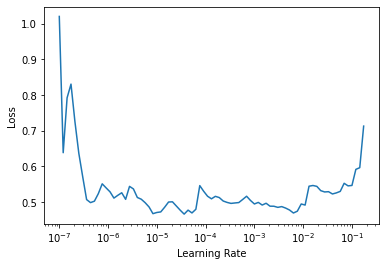

In [55]:
suggested_lrs = learn.lr_find()

In [56]:
print(f"min/10: {suggested_lrs.lr_min: .2e},\
     steepest point: {suggested_lrs.lr_steep: .2e}")

min/10:  3.63e-06,     steepest point:  3.31e-06


In [57]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2))

epoch,train_loss,valid_loss,_rmse,time
0,0.511866,0.371616,0.609603,01:09


In [58]:
#suggested_lrs = learn.lr_find()

In [59]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3))

epoch,train_loss,valid_loss,_rmse,time
0,0.451876,0.283105,0.532076,01:36


In [60]:
#suggested_lrs = learn.lr_find()

In [61]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,_rmse,time
0,0.360491,0.245865,0.495847,02:04
1,0.350834,0.208301,0.456401,02:03


In [62]:
df_test.head(3)

,id,url_legal,license,excerpt
0,c0f722661,NaN,NaN,"My hope lay in Jack's promise that he would keep a bright light burning in the upper story to guide me on my course. On a clear night this light was visible from the village, but somehow or other I failed to take into account the state of the weather. The air was full of eddying flakes, which would render the headlight of a locomotive invisible a hundred yards distant. Strange that this important fact never occurred to me until I was fully a fourth of a mile from the village. Then, after looking in vain for the beacon light, the danger of my situation struck me, and I halted.\n""I am certai..."
1,f0953f0a5,NaN,NaN,"Dotty continued to go to Mrs. Gray's every night with the milk. Sometimes Katie went with her, and then they always paused a while under the acorn-tree and played ""King and Queen."" Dotty said she wished they could ever remember to bring their nipperkins, for in that case the milk would taste a great deal more like nectar. The ""nipperkins"" were a pair of handled cups which the children supposed to be silver, and which they always used at table.\nDotty knew she was doing wrong every time she played ""King and Queen."" She knew the milk was not hers, but Mrs. Gray's; still she said to herself, ..."
2,0df072751,NaN,NaN,"It was a bright and cheerful scene that greeted the eyes of Captain Raymond and his son as they entered the parlor of the adjacent cottage.\nIt was strictly a family gathering, yet the room was quite full. Mr. Dinsmore was there with his wife, his daughter Elsie and her children, Edward and Zoe, Elsie Leland with her husband and babe, Violet Raymond with her husband's two little girls, Lulu and Grace, and lastly Rosie and Walter.\nEverybody had a kindly greeting for the captain, and Violet's bright face grew still brighter as she made room for him on the sofa by her side.\n""We were beginni..."


In [63]:
text = df_test.loc[0].excerpt
target = df_train.loc[0].target

In [64]:
text

'My hope lay in Jack\'s promise that he would keep a bright light burning in the upper story to guide me on my course. On a clear night this light was visible from the village, but somehow or other I failed to take into account the state of the weather. The air was full of eddying flakes, which would render the headlight of a locomotive invisible a hundred yards distant. Strange that this important fact never occurred to me until I was fully a fourth of a mile from the village. Then, after looking in vain for the beacon light, the danger of my situation struck me, and I halted.\n"I am certain to go wrong," I said to myself.\n"It is out of my power to follow a direct course without something to serve as a compass. I will go back to the village and wait till morning."'

In [65]:
text2 = df_test.loc[1].excerpt
target2 = df_train.loc[1].target

In [66]:
(text2,target2)

('Dotty continued to go to Mrs. Gray\'s every night with the milk. Sometimes Katie went with her, and then they always paused a while under the acorn-tree and played "King and Queen." Dotty said she wished they could ever remember to bring their nipperkins, for in that case the milk would taste a great deal more like nectar. The "nipperkins" were a pair of handled cups which the children supposed to be silver, and which they always used at table.\nDotty knew she was doing wrong every time she played "King and Queen." She knew the milk was not hers, but Mrs. Gray\'s; still she said to herself, "Ruthie needn\'t give so much measure, all pressed down and run over. If Queenie and I should drink a great deal more, there would always be a quart left. Yes, I know there would."\nMrs. Gray never said anything about the milk; she merely poured it out in a pan, and gave back the pail to Dotty, asking her at the same time as many questions as the child would stay to hear.',
 -0.31537234199999997)

In [67]:
learn.predict(text2)

((-0.5232691764831543), tensor([-0.5233]), tensor([-0.5233]))

In [68]:
text3 = df_test.loc[2].excerpt
target3 = df_train.loc[2].target

In [69]:
(text3,target3)

('It was a bright and cheerful scene that greeted the eyes of Captain Raymond and his son as they entered the parlor of the adjacent cottage.\nIt was strictly a family gathering, yet the room was quite full. Mr. Dinsmore was there with his wife, his daughter Elsie and her children, Edward and Zoe, Elsie Leland with her husband and babe, Violet Raymond with her husband\'s two little girls, Lulu and Grace, and lastly Rosie and Walter.\nEverybody had a kindly greeting for the captain, and Violet\'s bright face grew still brighter as she made room for him on the sofa by her side.\n"We were beginning to wonder what was keeping you," she said.\n"Yes, I\'m afraid I am rather behind time," he returned. "I hope you have not delayed your tea for me, Mrs. Dinsmore."\n"No; it is but just ready," she said. "Ah, there\'s the bell. Please, all of you walk out."\nWhen the meal was over all returned to the parlor, where they spent the next hour in desultory chat.',
 -0.580117966)

In [70]:
learn.predict(text3)

((-0.20019595324993134), tensor([-0.2002]), tensor([-0.2002]))

In [71]:
learn.path=Path(".")

In [72]:
learn.export("./final_model")